Linear Regresion without Gradient Descent



We will start by using scikit-learn to perform regression. (In fact we will use it to both create and solve a linear regression problem.)


In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

Mean squared error: 4.56
Variance score: 1.00


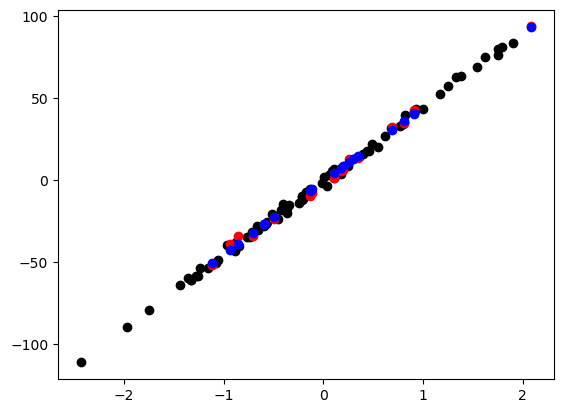

In [43]:
# of features (how many dimensions the problem has), and the amount of noise.
X, y = make_regression(n_samples=100, n_features=1, noise = 2)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

regr = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
regr.fit(X_train, y_train)      
       # Train the regression model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])
#
# Evaluate the model
#

# Data on how good the model is:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plotting training data, test data, and results.
plt.scatter(X_train, y_train, color="black")
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, regr.predict(X_test), color="blue")

plt.show()

Using Gradient Descent

Mean squared error: 2.93
Variance score: 1.00


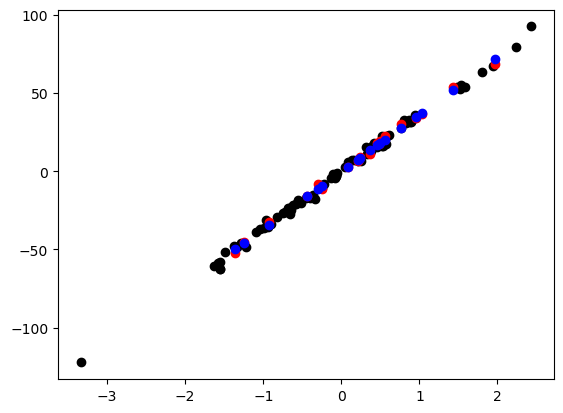

In [44]:

# Generate a regression problem:
#

# The main parameters of make-regression are the number of samples, the number
# of features (how many dimensions the problem has), and the amount of noise.
X, y = make_regression(n_samples=100, n_features=1, noise = 2)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

#
# Solve the problem using the built-in regresson model
#
regr = linear_model.LinearRegression() # A regression model object
regr.fit(X_train, y_train)             # Train the regression model

#
# Evaluate the model
#

# Data on how good the model is:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plotting training data, test data, and results.
plt.scatter(X_train, y_train, color="black")
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, regr.predict(X_test), color="blue")

plt.show()



[-0.04163241] [22.13372605]
0.021971311065237527


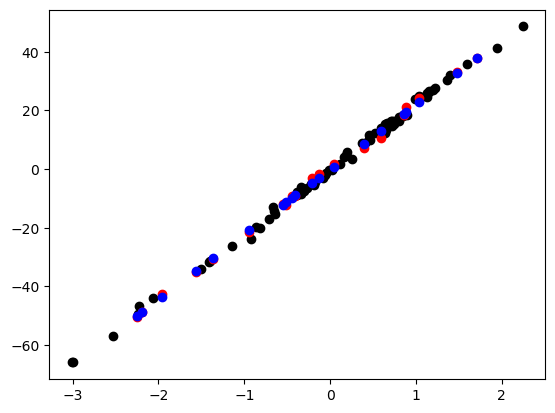

In [45]:
# Let's assume some training data for X_train and y_train
# X_train is the feature set and y_train is the corresponding labels
# Create a range of X values for plotting


# For the sake of example, let's create some random linear-like data
X, y = make_regression(n_samples=100, n_features=1, noise = 1)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Simple Linear Regression Model

# Initialize weights w0 (intercept) and w1 (slope) with zeros or random values
w0 = 0
w1 = 0
m = X_train.shape[0]
# Learning rate
alpha = 0.001

# Number of iterations

def predict(x, w0, w1):
    y_pred = w0 + w1 * X_test
    return y_pred

errors = []
# Training the model

for iteration in range(m):
    for i in range(X_train.shape[0]):
        # Make a prediction
        pi = w0 + w1 * X_train[i]
        # Calculate the error
        error_i = (y_train[i] - pi)
        errors.append(error_i.item())
        # Update the weights
        w0 = w0 + alpha * error_i
        w1 = w1 + alpha * error_i * X_train[i]
        
# Print model parameters

print(w0, w1)
MSE = np.mean(error_i)** 2
print(MSE)

plt.scatter(X_train, y_train, color="black")
plt.scatter(X_test, y_test, color="red")
plt.scatter(X_test, predict(X_test, w0, w1), color="blue")

# Data on how good the model is:
#print("Mean squared error: %.2f"
 #     % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(X_test, y_test))

Multivariable Regression

Mean squared error: 7.64
Coefficient of determination: 1.00


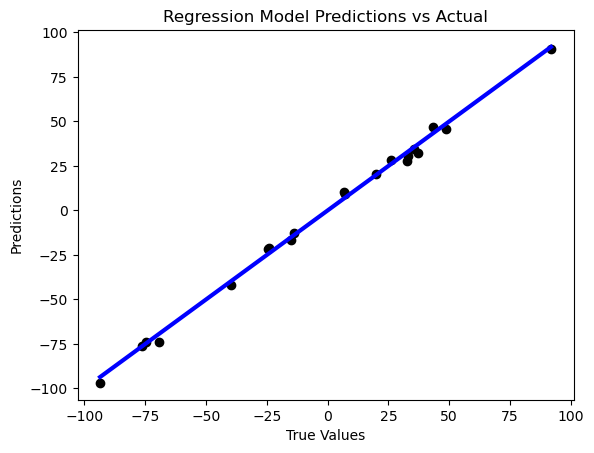

In [46]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate random linear-like data with 3 features
X, y = make_regression(n_samples=100, n_features=3, noise=3)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize weights with zeros. Now we need a weight for each feature plus the intercept.
w = np.zeros(X_train.shape[1] + 1)

# Learning rate
alpha = 0.001

# Number of training examples
m = X_train.shape[0]

# Add a column of ones to X_train to account for the bias (intercept)
X_train_with_bias = np.c_[np.ones((m, 1)), X_train]

# Training the model
for iteration in range(1000):  # Number of epochs
    for i in range(m):
        # Make a prediction
        pi = np.dot(X_train_with_bias[i], w)
        # Calculate the error
        error_i = y_train[i] - pi
        # Update the weights
        w += alpha * error_i * X_train_with_bias[i]

# Function to make predictions
def predict(X, w):
    # Add bias term
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return np.dot(X_with_bias, w)

predictions = predict(X_test, w)

# Make predictions using the test set
y_pred = predict(X_test, w)

# Make predictions using the test set
y_pred = predict(X_test, w)

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Optionally, you can plot the actual vs predicted values to visually assess the model
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regression Model Predictions vs Actual')
plt.show()
